In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='medium')
# plt.rc('ytick', labelsize='medium')

In [3]:
df = aux.load_data(Path("../results_synced/stride/"))
df

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,Trace,ResNet_DFS,False,1,0,128,5,1,0.374479,0.374479,...,training/EXP_stride_f1.0_base_2023-03-16_13-39...,11260,0,10985,NaN,NaN,NaN,NaN,41,NaN
1,Trace,ResNet_DFS,True,1,0,128,5,1,0.462240,0.462240,...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,11260,33260,10985,0.284317,0.919347,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,training/EXP_stride_f1.0_2023-03-16_15-42/logs...,109,54
2,Trace,ResNet_DFS,False,1,0,128,5,2,0.460417,0.460417,...,training/EXP_stride_f1.1_base_2023-03-16_20-46...,11245,0,10970,NaN,NaN,NaN,NaN,84,NaN
3,Trace,ResNet_DFS,True,1,0,128,5,2,0.370573,0.370573,...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,11245,33245,10970,0.295644,0.912795,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,training/EXP_stride_f1.1_2023-03-16_22-52/logs...,44,57
4,Trace,ResNet_DFS,False,1,0,128,5,3,0.439844,0.439844,...,training/EXP_stride_f1.2_base_2023-03-17_04-04...,11230,0,10955,NaN,NaN,NaN,NaN,44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,GunPoint,CNN_DFS,True,3,0,128,5,3,0.600098,0.600098,...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,6105,18105,5955,0.109927,0.987760,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,training/EXP_stride_f3.2_2023-03-16_15-00/logs...,81,57
596,GunPoint,CNN_DFS,False,3,0,128,5,4,0.692383,0.692383,...,training/EXP_stride_f3.3_base_2023-03-16_15-23...,6090,0,5940,NaN,NaN,NaN,NaN,118,NaN
597,GunPoint,CNN_DFS,True,3,0,128,5,4,0.674805,0.674805,...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,6090,18090,5940,0.116305,0.986318,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,training/EXP_stride_f3.3_2023-03-16_15-34/logs...,113,59
598,GunPoint,CNN_DFS,False,3,0,128,5,5,0.664551,0.664551,...,training/EXP_stride_f3.4_base_2023-03-16_15-58...,6075,0,5925,NaN,NaN,NaN,NaN,119,NaN


In [4]:
dfp = df.groupby(["dataset", "arch", "window_stride", "pretrained"])[
    ["target_val_acc", "target_test_acc", "pretrain_val_r2"]
    ].mean().reset_index()
dfp

,dataset,arch,window_stride,pretrained,target_val_acc,target_test_acc,pretrain_val_r2
0,Coffee,CNN_DFS,1,False,0.527500,0.484901,NaN
1,Coffee,CNN_DFS,1,True,0.658906,0.564488,0.977534
2,Coffee,CNN_DFS,2,False,0.536719,0.493414,NaN
3,Coffee,CNN_DFS,2,True,0.653438,0.577599,0.975123
4,Coffee,CNN_DFS,3,False,0.591562,0.528691,NaN
...,...,...,...,...,...,...,...
115,Trace,ResNet_DFS,3,True,0.475990,0.444485,0.948960
116,Trace,ResNet_DFS,4,False,0.450781,0.403787,NaN
117,Trace,ResNet_DFS,4,True,0.509062,0.447445,0.956458
118,Trace,ResNet_DFS,5,False,0.463125,0.430790,NaN


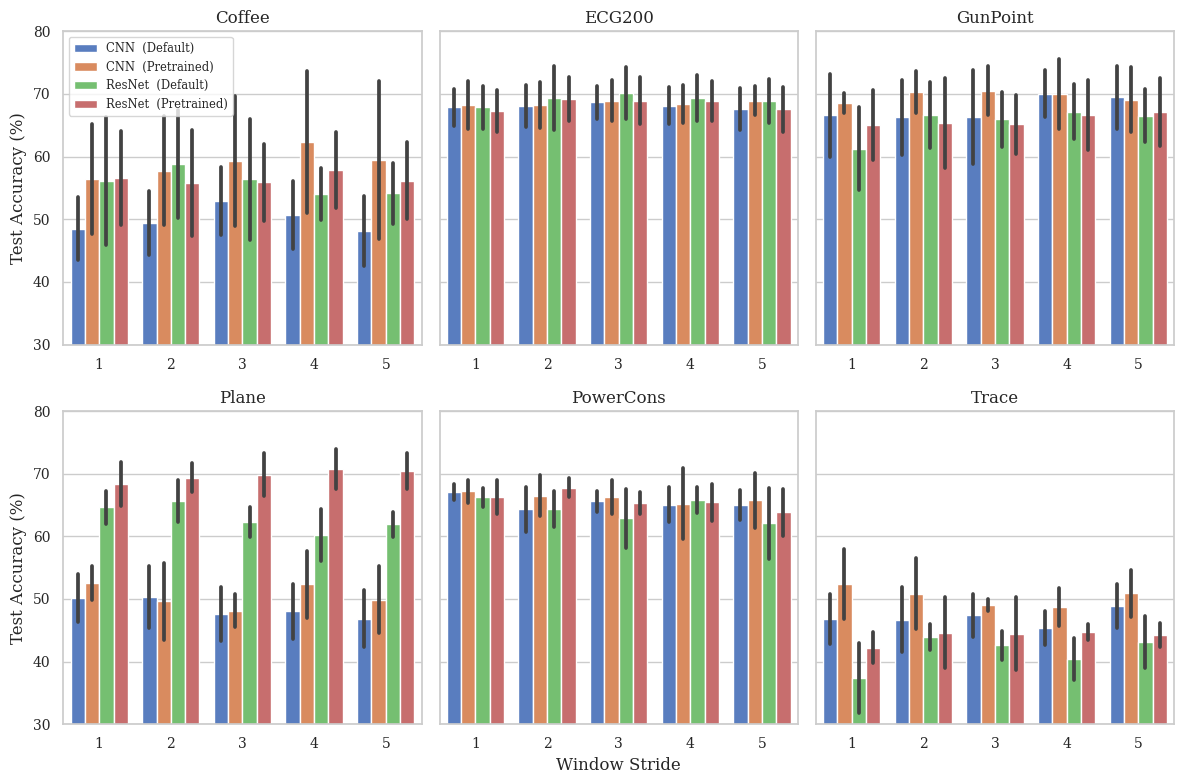

In [5]:
data = df.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["target_val_acc"] = 100*data["target_val_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_stride", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (30, 80),
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Stride")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,2).set_xlabel("")
g.facet_axis(0,3).set_xlabel("")
g.facet_axis(0,5).set_xlabel("");
plt.savefig("stride.pdf")

In [6]:
dfl = aux.load_data(Path("../results_synced/length/"))
dfl

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,GunPoint,CNN_DFS,False,4,0,128,10,1,0.778320,0.778320,...,training/EXP_length_f4.0_base_2023-03-17_20-39...,6120,0,5970,NaN,NaN,NaN,NaN,113,NaN
1,GunPoint,CNN_DFS,True,4,0,128,10,1,0.750488,0.750488,...,training/EXP_length_f4.0_2023-03-17_20-51/logs...,6120,18120,5970,0.098839,0.990225,training/EXP_length_f4.0_2023-03-17_20-51/logs...,training/EXP_length_f4.0_2023-03-17_20-51/logs...,116,59
2,GunPoint,CNN_DFS,False,4,0,128,15,1,0.732910,0.732910,...,training/EXP_length_f4.1_base_2023-03-17_21-18...,6105,0,5955,NaN,NaN,NaN,NaN,106,NaN
3,GunPoint,CNN_DFS,True,4,0,128,15,1,0.747070,0.747070,...,training/EXP_length_f4.1_2023-03-17_21-33/logs...,6105,18105,5955,0.124697,0.984422,training/EXP_length_f4.1_2023-03-17_21-33/logs...,training/EXP_length_f4.1_2023-03-17_21-33/logs...,85,59
4,GunPoint,CNN_DFS,False,4,0,128,20,1,0.687012,0.687012,...,training/EXP_length_f4.2_base_2023-03-17_22-08...,6090,0,5940,NaN,NaN,NaN,NaN,116,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Trace,ResNet_DFS,False,0,0,128,15,1,0.409115,0.409115,...,training/EXP_length_f0.1_base_2023-03-18_04-49...,11230,0,10955,NaN,NaN,NaN,NaN,87,NaN
470,Trace,ResNet_DFS,True,0,0,128,15,1,0.465885,0.465885,...,training/EXP_length_f0.1_2023-03-18_11-23/logs...,11230,33230,10955,0.205616,0.957804,training/EXP_length_f0.1_2023-03-18_11-23/logs...,training/EXP_length_f0.1_2023-03-18_11-23/logs...,83,54
471,Trace,ResNet_DFS,False,0,0,128,20,1,0.414062,0.414062,...,training/EXP_length_f0.2_base_2023-03-19_01-13...,11215,0,10940,NaN,NaN,NaN,NaN,57,NaN
472,Trace,ResNet_DFS,True,0,0,128,20,1,0.474219,0.474219,...,training/EXP_length_f0.2_2023-03-19_07-03/logs...,11215,33215,10940,0.149851,0.977586,training/EXP_length_f0.2_2023-03-19_07-03/logs...,training/EXP_length_f0.2_2023-03-19_07-03/logs...,60,57


In [7]:
dflp = dfl.groupby(["dataset", "arch", "window_length", "pretrained"])[["target_val_acc", "target_test_acc", "pretrain_val_r2"]].mean().reset_index()
dflp

,dataset,arch,window_length,pretrained,target_val_acc,target_test_acc,pretrain_val_r2
0,Coffee,CNN_DFS,10,False,0.570781,0.522486,NaN
1,Coffee,CNN_DFS,10,True,0.653750,0.593915,0.984615
2,Coffee,CNN_DFS,15,False,0.591094,0.526522,NaN
3,Coffee,CNN_DFS,15,True,0.572031,0.516226,0.977063
4,Coffee,CNN_DFS,20,False,0.603993,0.521890,NaN
...,...,...,...,...,...,...,...
91,Trace,ResNet_DFS,15,True,0.472083,0.424596,0.910143
92,Trace,ResNet_DFS,20,False,0.400156,0.385570,NaN
93,Trace,ResNet_DFS,20,True,0.448763,0.408892,0.911126
94,Trace,ResNet_DFS,25,False,0.392535,0.371691,NaN


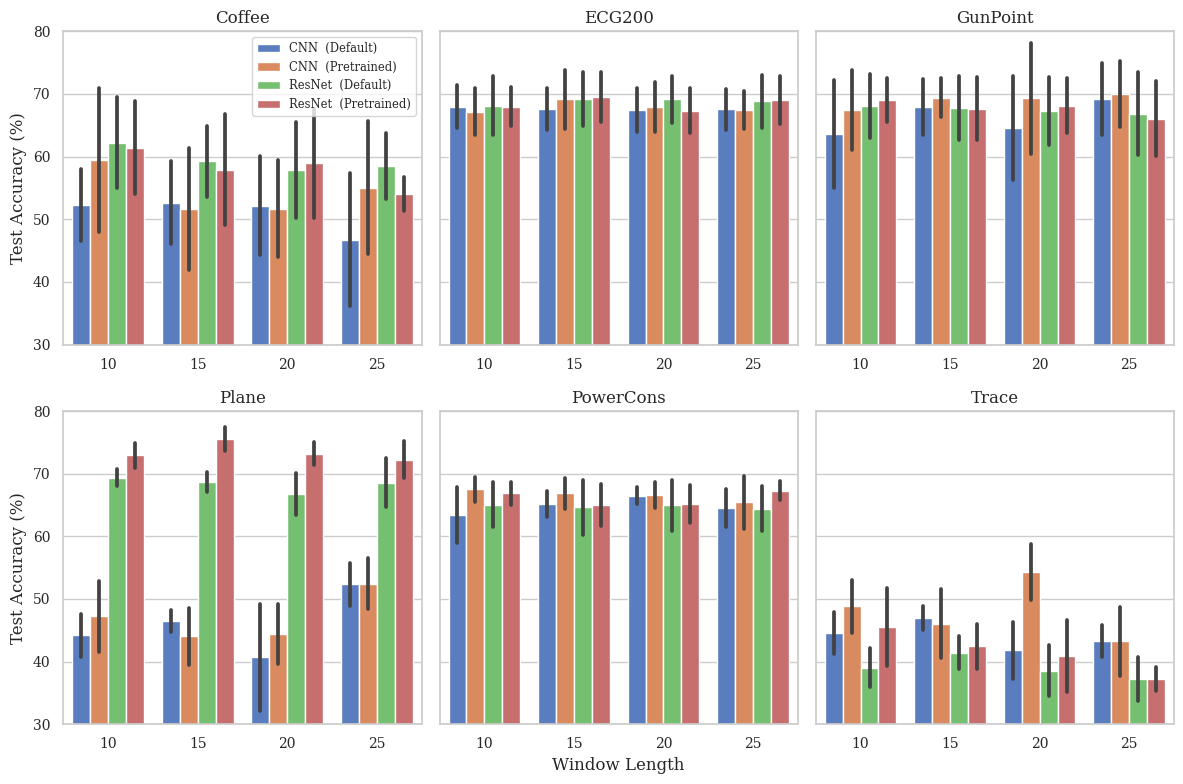

In [8]:
data = dfl.copy()
data["target_test_acc"] = 100*data["target_test_acc"]
data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
data["hue"] = data["arch"] + " " + data["xd"]
data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="window_length", y="target_test_acc", hue="hue", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (30, 80),
                    "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Length")
g.add_legend(adjust_subtitles=True, fontsize="x-small")
g.facet_axis(0,2).set_xlabel("");
g.facet_axis(0,3).set_xlabel("");
g.facet_axis(0,5).set_xlabel("");
plt.savefig("length.pdf")

In [9]:
df = aux.load_data(Path("../results/"))
df["target_nepochs"] = df["target_nepochs"].astype(int)
df.groupby(["arch", "dataset", "approach"])[["target_test_acc", "target_test_auroc", "target_nepochs"]].mean()


,,,target_test_acc,target_test_auroc,target_nepochs
arch,dataset,approach,,,
CNN_DFS,GunPoint,linear,0.484035,0.36453,0.0


In [10]:
dfr = aux.load_data(Path("../results_synced/ratio"))
dfr

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,target_train_csv,nsamp_tra,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs
0,Trace,CNN_DFS,False,2,0,128,5,1,0.535156,0.535156,...,training/2023-03-20_23-53_EXP_ratio_CNN_DFS_Tr...,2251,0,10985,NaN,NaN,NaN,NaN,111,NaN
1,Trace,CNN_DFS,True,2,0,128,5,1,0.621094,0.621094,...,training/2023-03-21_00-01_EXP_ratio_CNN_DFS_Tr...,2251,6652,10985,0.355210,0.874046,training/2023-03-21_00-01_EXP_ratio_CNN_DFS_Tr...,training/2023-03-21_00-01_EXP_ratio_CNN_DFS_Tr...,105,56
2,Trace,CNN_DFS,True,2,0,128,5,1,0.589844,0.589844,...,training/2023-03-21_00-15_EXP_ratio_CNN_DFS_Tr...,2251,13304,10985,0.290784,0.916494,training/2023-03-21_00-15_EXP_ratio_CNN_DFS_Tr...,training/2023-03-21_00-15_EXP_ratio_CNN_DFS_Tr...,95,56
3,Trace,CNN_DFS,True,2,0,128,5,1,0.636719,0.636719,...,training/2023-03-21_00-36_EXP_ratio_CNN_DFS_Tr...,2251,19956,10985,0.255052,0.936058,training/2023-03-21_00-36_EXP_ratio_CNN_DFS_Tr...,training/2023-03-21_00-36_EXP_ratio_CNN_DFS_Tr...,47,56
4,Trace,CNN_DFS,True,2,0,128,5,1,0.533854,0.533854,...,training/2023-03-21_01-03_EXP_ratio_CNN_DFS_Tr...,2251,26608,10985,0.175883,0.969185,training/2023-03-21_01-03_EXP_ratio_CNN_DFS_Tr...,training/2023-03-21_01-03_EXP_ratio_CNN_DFS_Tr...,38,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Plane,ResNet_DFS,True,1,0,128,5,1,0.520833,0.520833,...,training/2023-03-21_08-39_EXP_ratio_ResNet_DFS...,1235,14617,6033,0.073313,0.994553,training/2023-03-21_08-39_EXP_ratio_ResNet_DFS...,training/2023-03-21_08-39_EXP_ratio_ResNet_DFS...,34,59
1201,Plane,ResNet_DFS,True,1,0,128,5,1,0.549479,0.549479,...,training/2023-03-21_09-29_EXP_ratio_ResNet_DFS...,1235,18273,6033,0.063028,0.995976,training/2023-03-21_09-29_EXP_ratio_ResNet_DFS...,training/2023-03-21_09-29_EXP_ratio_ResNet_DFS...,36,55
1202,Plane,ResNet_DFS,False,1,0,128,5,1,0.506510,0.506510,...,training/2023-03-21_10-28_EXP_ratio_ResNet_DFS...,2470,0,6033,NaN,NaN,NaN,NaN,110,NaN
1203,Plane,ResNet_DFS,True,1,0,128,5,1,0.483073,0.483073,...,training/2023-03-21_10-46_EXP_ratio_ResNet_DFS...,2470,3654,6033,0.127964,0.983510,training/2023-03-21_10-46_EXP_ratio_ResNet_DFS...,training/2023-03-21_10-46_EXP_ratio_ResNet_DFS...,86,59


In [11]:
def xd(df: pd.DataFrame):

    pcts_tra = [0.2, 0.4, 0.6, 0.8, 1]
    pcts_pre = [0, 0.2, 0.4, 0.6, 0.8, 1]

    dfs = []
    for (dataset, arch), dfg in df.groupby(["dataset", "arch"]):

        if dataset in ["Coffee"]:
            dfg = aux.__fix_close_values(dfg, "nsamp_pre")

        dfg["nsamp_tra_ratio"] = dfg["nsamp_tra"].replace(
            to_replace={n: pcts_tra[i] for i, n in enumerate(dfg["nsamp_tra"].unique())})
        
        dfg["nsamp_pre_ratio"] = dfg["nsamp_pre"].replace(
            to_replace={n: pcts_pre[i] for i, n in enumerate(dfg["nsamp_pre"].unique())})

        dfs.append(dfg)

    return pd.concat(dfs)


dfrb = xd(dfr)
dfrb

,dataset,arch,pretrained,fold_number,random_state,batch_size,window_length,window_stride,target_val_acc,target_val_f1,...,nsamp_pre,nsamp_test,pretrain_val_mse,pretrain_val_r2,pretrain_best_model,pretrain_train_csv,target_nepochs,pretrain_nepochs,nsamp_tra_ratio,nsamp_pre_ratio
143,Coffee,CNN_DFS,False,2,0,128,5,1,0.312500,0.312500,...,0,3131,NaN,NaN,NaN,NaN,0,NaN,0.2,0.0
144,Coffee,CNN_DFS,True,2,0,128,5,1,0.687500,0.687500,...,1998,3131,0.354237,0.888054,training/2023-03-20_21-11_EXP_ratio_CNN_DFS_Co...,training/2023-03-20_21-11_EXP_ratio_CNN_DFS_Co...,0,55,0.2,0.2
145,Coffee,CNN_DFS,True,2,0,128,5,1,0.687500,0.687500,...,3997,3131,0.234377,0.948814,training/2023-03-20_21-20_EXP_ratio_CNN_DFS_Co...,training/2023-03-20_21-20_EXP_ratio_CNN_DFS_Co...,0,57,0.2,0.4
146,Coffee,CNN_DFS,True,2,0,128,5,1,0.312500,0.312500,...,5996,3131,0.204017,0.959156,training/2023-03-20_21-30_EXP_ratio_CNN_DFS_Co...,training/2023-03-20_21-30_EXP_ratio_CNN_DFS_Co...,0,58,0.2,0.6
147,Coffee,CNN_DFS,True,2,0,128,5,1,0.687500,0.687500,...,7995,3131,0.168785,0.972530,training/2023-03-20_21-42_EXP_ratio_CNN_DFS_Co...,training/2023-03-20_21-42_EXP_ratio_CNN_DFS_Co...,0,59,0.2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Trace,ResNet_DFS,False,1,0,128,5,1,0.471354,0.471354,...,0,10985,NaN,NaN,NaN,NaN,20,NaN,0.2,0.0
234,Trace,ResNet_DFS,True,1,0,128,5,1,0.424479,0.424479,...,6652,10985,0.445356,0.802026,training/2023-03-21_11-31_EXP_ratio_ResNet_DFS...,training/2023-03-21_11-31_EXP_ratio_ResNet_DFS...,14,17,0.2,0.2
983,Trace,ResNet_DFS,False,0,0,128,5,1,0.601562,0.601562,...,0,10985,NaN,NaN,NaN,NaN,88,NaN,0.2,0.0
984,Trace,ResNet_DFS,True,0,0,128,5,1,0.602865,0.602865,...,6652,10985,0.384899,0.852009,training/2023-03-21_10-36_EXP_ratio_ResNet_DFS...,training/2023-03-21_10-36_EXP_ratio_ResNet_DFS...,55,21,0.2,0.2


In [12]:
check = dfrb.groupby(["arch", "dataset", "nsamp_tra_ratio", "nsamp_pre_ratio"])[["pretrained"]].count()
check[check["pretrained"]<5]

pretrained
arch       dataset  nsamp_tra_ratio nsamp_pre_ratio            
CNN_DFS    Trace    1.0             0.4                       3
                                    0.6                       2
                                    0.8                       2
ResNet_DFS Coffee   0.4             0.6                       4
                                    0.8                       2
                                    1.0                       1
                    0.6             0.0                       1
           ECG200   1.0             0.0                       4
                                    0.2                       2
                                    0.4                       1
           GunPoint 0.6             0.8                       4
                                    1.0                       3
                    0.8             0.0                       2
                                    0.2                       1
                                    0.4                       1
           Plane    0.2             1.0                       4
                    0.4             0.0                       4
                                    0.2                       4
                                    0.4                       3
                                    0.6                       2
           Trace    0.2             0.0                       3
                                    0.2                       2

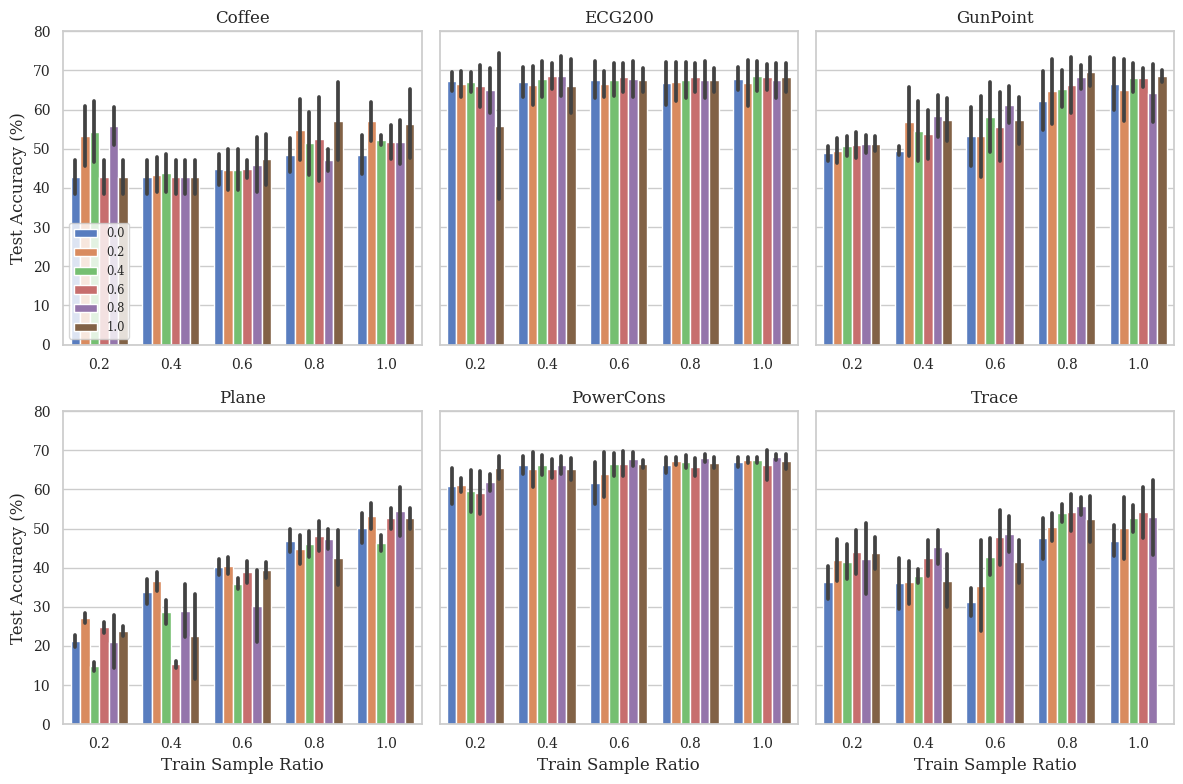

In [13]:
data = dfrb[dfrb["arch"] == "CNN_DFS"].copy()
data["target_test_acc"] = 100*data["target_test_acc"]
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
#data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="nsamp_tra_ratio", y="target_test_acc", hue="nsamp_pre_ratio", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (0, 80),
                "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Train Sample Ratio")
g.add_legend(adjust_subtitles=True, fontsize="x-small");
# g.facet_axis(0,2).set_xlabel("");
# g.facet_axis(0,3).set_xlabel("");
# g.facet_axis(0,5).set_xlabel("");
plt.savefig("ratio_CNN.pdf")

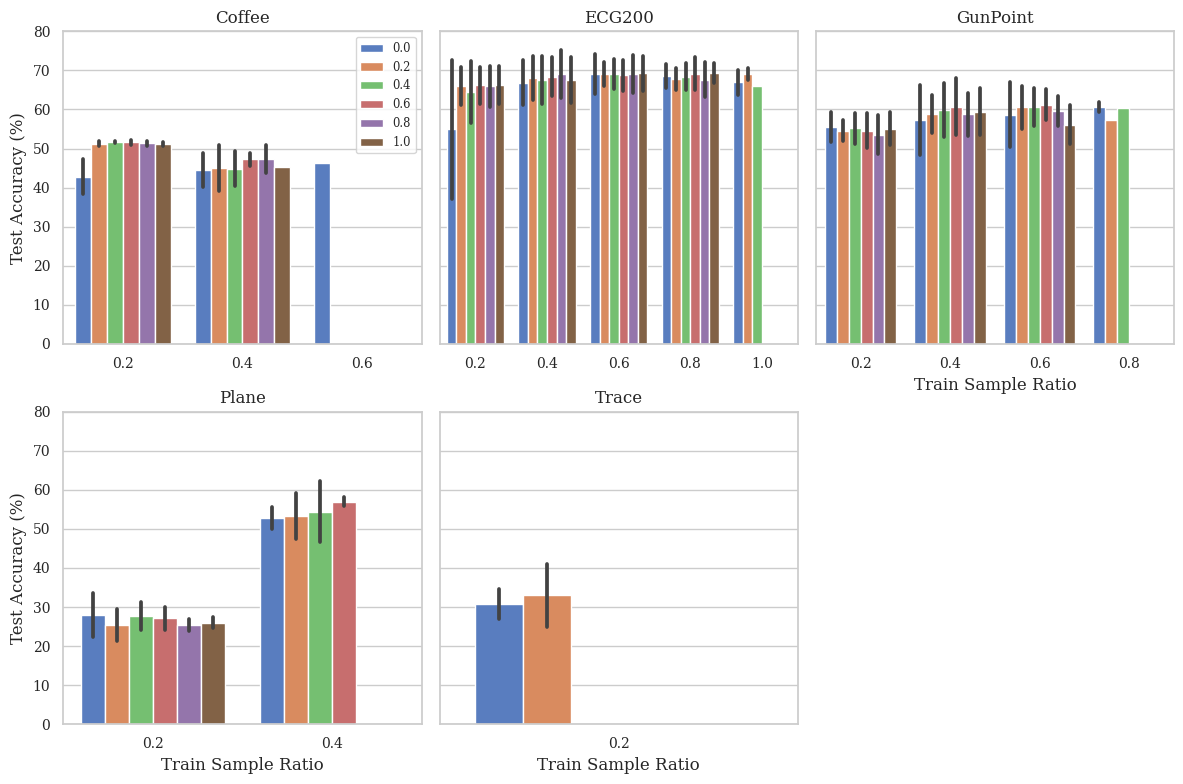

In [14]:
data = dfrb[dfrb["arch"] == "ResNet_DFS"].copy()
data["target_test_acc"] = 100*data["target_test_acc"]
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
#data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x="nsamp_tra_ratio", y="target_test_acc", hue="nsamp_pre_ratio", col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (0, 80),
                "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Train Sample Ratio")
g.add_legend(adjust_subtitles=True, fontsize="x-small");
# g.facet_axis(0,2).set_xlabel("");
# g.facet_axis(0,3).set_xlabel("");
# g.facet_axis(0,5).set_xlabel("");
plt.savefig("ratio_ResNet.pdf")